<a href="https://colab.research.google.com/github/xiaobo-fu/python_for_finance/blob/master/FXCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "/content/gdrive/My Drive/G/ML/python_for_finance/source/"
CHAPTER_ID = "python_for_finance"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if not os.path.isdir(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
pip install fxcmpy

In [0]:
import fxcmpy
token = open('/content/gdrive/My Drive/G/ML/python_for_finance/token.txt').read() 
api = fxcmpy.fxcmpy(access_token=token, log_level='error')

In [0]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [0]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [0]:
from fxcmpy import fxcmpy_tick_data_reader as tdr

In [9]:
print(tdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [0]:
start = dt.datetime(2019, 3, 1)
stop = dt.datetime(2019, 3, 2)

In [0]:
td = tdr('GBPUSD', start, stop)

In [12]:
td

In [13]:
td.get_raw_data().info()

<class 'pandas.core.frame.DataFrame'>
Index: 2263613 entries, 02/24/2019 22:00:17.005 to 03/01/2019 21:59:02.100
Data columns (total 2 columns):
Bid    float64
Ask    float64
dtypes: float64(2)
memory usage: 51.8+ MB


In [14]:
td.get_data().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2263613 entries, 2019-02-24 22:00:17.005000 to 2019-03-01 21:59:02.100000
Data columns (total 2 columns):
Bid    float64
Ask    float64
dtypes: float64(2)
memory usage: 51.8 MB


In [15]:
td.get_data().tail()

,Bid,Ask
2019-03-01 21:59:00.296,1.32058,1.32100
2019-03-01 21:59:00.421,1.32053,1.32098
2019-03-01 21:59:00.745,1.32051,1.32096
2019-03-01 21:59:01.097,1.32044,1.32112
2019-03-01 21:59:02.100,1.32043,1.32111


In [0]:
from fxcmpy import fxcmpy_candles_data_reader as cdr

In [17]:
print(cdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [0]:
start = dt.datetime(2018, 5, 1)
stop = dt.datetime(2018, 6, 30)

In [0]:
period = 'H1'

In [0]:
candles = cdr('EURUSD', start, stop, period)

In [0]:
data = candles.get_data()

In [22]:
data.head()

,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
2018-04-29 21:00:00,1.21226,1.21299,1.21226,1.21277,1.21249,1.21311,1.21248,1.21289
2018-04-29 22:00:00,1.21277,1.21287,1.21202,1.21215,1.21289,1.21291,1.21203,1.21217
2018-04-29 23:00:00,1.21215,1.21228,1.21190,1.21227,1.21217,1.21230,1.21190,1.21228
2018-04-30 00:00:00,1.21227,1.21319,1.21217,1.21286,1.21228,1.21321,1.21218,1.21288
2018-04-30 01:00:00,1.21286,1.21341,1.21214,1.21333,1.21288,1.21343,1.21216,1.21334


In [0]:
data['MidClose'] = data[['BidClose', 'AskClose']].mean(axis=1)
data['SMA1'] = data['MidClose'].rolling(30).mean()
data['SMA2'] = data['MidClose'].rolling(100).mean()

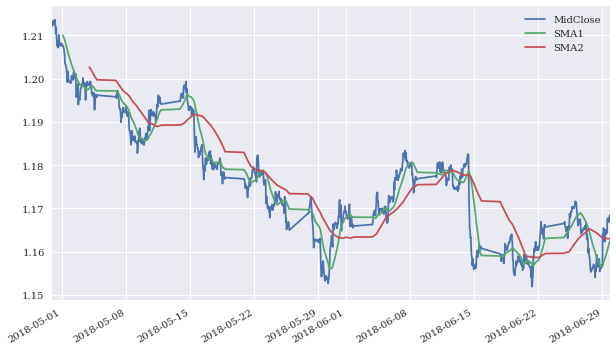

In [24]:
data[['MidClose', 'SMA1', 'SMA2']].plot(figsize=(10, 6));

In [25]:
fxcmpy.__version__

'1.2.4'

In [0]:
api = fxcmpy.fxcmpy(access_token=token, log_level='error')

In [0]:
instruments = api.get_instruments()

In [28]:
print(instruments)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'USDOLLAR', 'US2000', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'WHEATF', 'CORNF', 'Bund', 'XAU/USD', 'XAG/USD', 'EMBasket', 'JPYBasket', 'BTC/USD', 'BCH/USD', 'ETH/USD', 'LTC/USD', 'XRP/USD']


In [0]:
def output(data, dataframe):
    print('%3d | %s | %s | %6.5f, %6.5f'
        % (len(dataframe), data['Symbol'],
            pd.to_datetime(int(data['Updated']), unit='ms'),
            data['Rates'][0], data['Rates'][1]))

In [0]:
api.subscribe_market_data('GBP/USD', (output,))

In [31]:
candles = api.get_candles('GBP/USD', period='D1', number=3600)

  2 | GBP/USD | 2019-05-20 15:56:56.351000 | 1.27177, 1.27185


In [32]:
api.get_last_price('GBP/USD')

Bid     1.27177
Ask     1.27185
High    1.27577
Low     1.27174
Name: 2019-05-20 15:56:56.351000, dtype: float64

In [33]:
candles[candles.columns[:4]].tail()

,bidopen,bidclose,bidhigh,bidlow
date,,,,
2019-05-13 21:00:00,1.30091,1.29560,1.30404,1.29406
2019-05-14 21:00:00,1.29560,1.29022,1.29703,1.28934
2019-05-15 21:00:00,1.29021,1.28396,1.29228,1.28257
2019-05-16 21:00:00,1.28396,1.27925,1.28535,1.27874
2019-05-17 21:00:00,1.27924,1.27140,1.27977,1.27096


In [0]:
candles = candles.drop(columns=['tickqty'])

In [35]:
candles.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow
date,,,,,,,,
2006-09-13 21:00:00,1.87437,1.87587,1.87787,1.87077,1.87472,1.87622,1.87822,1.87112
2006-09-14 21:00:00,1.87587,1.88627,1.89187,1.87547,1.87622,1.88662,1.89222,1.87582
2006-09-15 21:00:00,1.88627,1.88037,1.88817,1.87537,1.88662,1.88072,1.88852,1.87572
2006-09-18 21:00:00,1.88037,1.88017,1.88397,1.87337,1.88072,1.88052,1.88432,1.87372
2006-09-19 21:00:00,1.88017,1.88217,1.88877,1.87717,1.88052,1.88252,1.88912,1.87752


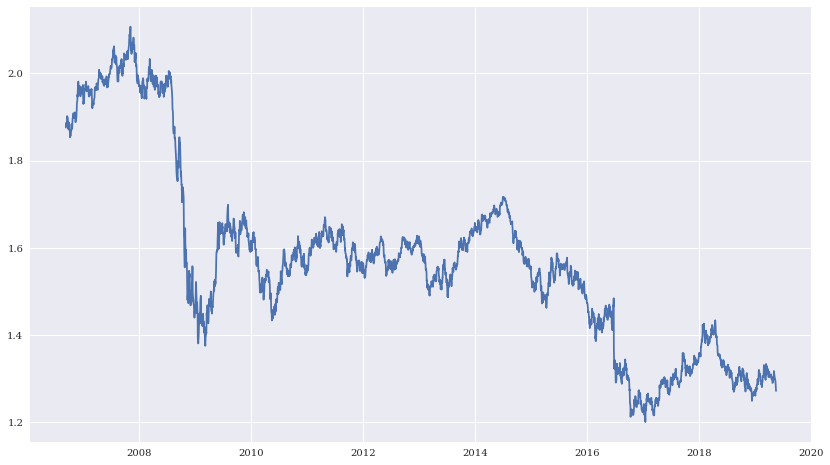

In [36]:
plt.figure(figsize = (14,8))
plt.plot(candles['bidclose'])
#plt.plot(candles['bidclose'],'rv')
#plt.plot(candles['bidhigh'])
#plt.plot(candles['bidlow'])
#plt.xticks(rotation=20)

In [0]:
data = candles

In [38]:
data.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow
date,,,,,,,,
2006-09-13 21:00:00,1.87437,1.87587,1.87787,1.87077,1.87472,1.87622,1.87822,1.87112
2006-09-14 21:00:00,1.87587,1.88627,1.89187,1.87547,1.87622,1.88662,1.89222,1.87582
2006-09-15 21:00:00,1.88627,1.88037,1.88817,1.87537,1.88662,1.88072,1.88852,1.87572
2006-09-18 21:00:00,1.88037,1.88017,1.88397,1.87337,1.88072,1.88052,1.88432,1.87372
2006-09-19 21:00:00,1.88017,1.88217,1.88877,1.87717,1.88052,1.88252,1.88912,1.87752


In [0]:
SMA1 = 30
SMA2 = 200

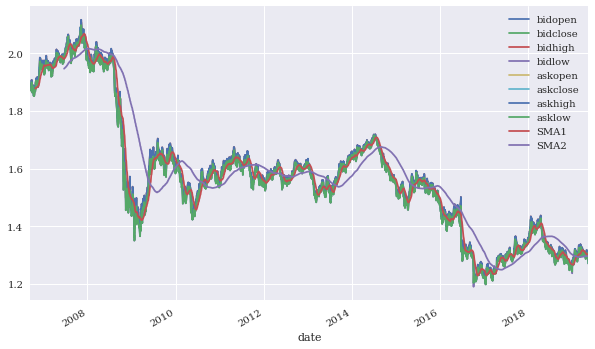

  3 | GBP/USD | 2019-05-20 15:56:57.362000 | 1.27177, 1.27185


In [40]:
data['SMA1'] = data['bidclose'].rolling(SMA1).mean()
data['SMA2'] = data['bidclose'].rolling(SMA2).mean()
data.plot(figsize=(10, 6));

In [41]:
data.dropna(inplace=True)
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
data.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,SMA1,SMA2,Position
date,,,,,,,,,,,
2007-06-20 21:00:00,1.98867,1.99297,1.99467,1.98697,1.98902,1.99332,1.99502,1.98732,1.980113,1.946432,1
2007-06-21 21:00:00,1.99297,1.99247,1.99407,1.98857,1.99332,1.99282,1.99442,1.98892,1.980537,1.947015,1
2007-06-22 21:00:00,1.99247,1.99857,1.99957,1.99107,1.99282,1.99892,1.99992,1.99142,1.981093,1.947576,1
2007-06-25 21:00:00,1.99857,1.99757,2.00057,1.99567,1.99892,1.99792,2.00092,1.99602,1.981707,1.948162,1
2007-06-26 21:00:00,1.99757,1.99877,2.00157,1.99567,1.99792,1.99912,2.00192,1.99602,1.982140,1.948755,1


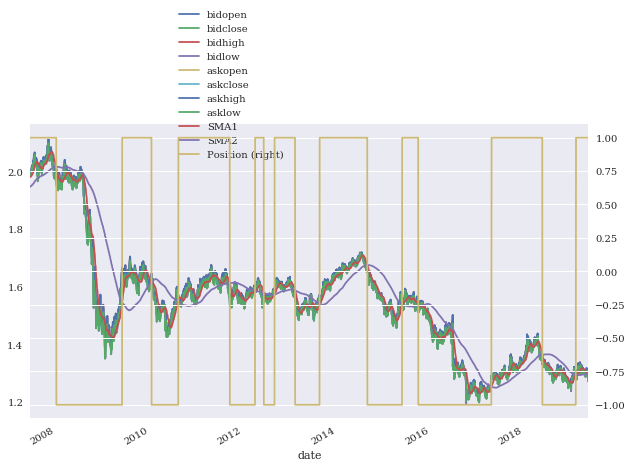

In [42]:
ax = data.plot(secondary_y='Position', figsize=(10, 6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [0]:
data['diff'] = data['Position'].diff()

In [0]:
data['return'] = data['bidclose'].diff()

In [45]:
data.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,SMA1,SMA2,Position,diff,return
date,,,,,,,,,,,,,
2007-06-20 21:00:00,1.98867,1.99297,1.99467,1.98697,1.98902,1.99332,1.99502,1.98732,1.980113,1.946432,1,NaN,NaN
2007-06-21 21:00:00,1.99297,1.99247,1.99407,1.98857,1.99332,1.99282,1.99442,1.98892,1.980537,1.947015,1,0.0,-0.0005
2007-06-22 21:00:00,1.99247,1.99857,1.99957,1.99107,1.99282,1.99892,1.99992,1.99142,1.981093,1.947576,1,0.0,0.0061
2007-06-25 21:00:00,1.99857,1.99757,2.00057,1.99567,1.99892,1.99792,2.00092,1.99602,1.981707,1.948162,1,0.0,-0.0010
2007-06-26 21:00:00,1.99757,1.99877,2.00157,1.99567,1.99792,1.99912,2.00192,1.99602,1.982140,1.948755,1,0.0,0.0012


In [0]:
data['profit'] = data['Position']*data['return']

In [0]:
data['sum'] = data['profit'].cumsum()

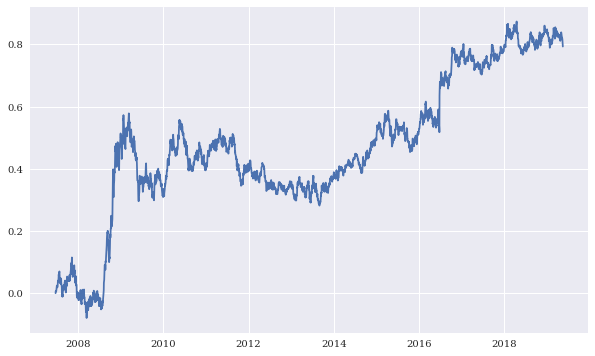

In [48]:
plt.figure(figsize=(10,6))
#ax = data['Position'].plot(secondary_y='Position', figsize=(10, 6))
plt.plot(data['sum'])

In [0]:
candles = api.get_candles('GBP/USD', period='D1', number=3600)

In [0]:
from itertools import product

In [51]:
candles.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2006-09-13 21:00:00,1.87437,1.87587,1.87787,1.87077,1.87472,1.87622,1.87822,1.87112,20209
2006-09-14 21:00:00,1.87587,1.88627,1.89187,1.87547,1.87622,1.88662,1.89222,1.87582,16291
2006-09-15 21:00:00,1.88627,1.88037,1.88817,1.87537,1.88662,1.88072,1.88852,1.87572,19511
2006-09-18 21:00:00,1.88037,1.88017,1.88397,1.87337,1.88072,1.88052,1.88432,1.87372,17201
2006-09-19 21:00:00,1.88017,1.88217,1.88877,1.87717,1.88052,1.88252,1.88912,1.87752,18570


In [54]:
sma1 = range(60, 100, 10)
sma2 = range(50, 150, 10)

 39 | GBP/USD | 2019-05-20 15:57:32.936000 | 1.27186, 1.27195


In [56]:
results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):
    data = pd.DataFrame(candles)
    #data = api.get_candles('GBP/USD', period='D1', number=3600)
    data.dropna(inplace=True)
    data['Returns'] = np.log(data['bidclose'] / data['bidclose'].shift(1))
    data['SMA1'] = data['bidclose'].rolling(SMA1).mean()
    data['SMA2'] = data['bidclose'].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame(
        {'SMA1': SMA1, 'SMA2': SMA2,
        'MARKET': perf['Returns'],
        'STRATEGY': perf['Strategy'],
        'OUT': perf['Strategy'] - perf['Returns']},
        index=[0]), ignore_index=True)

 50 | GBP/USD | 2019-05-20 15:57:41.463000 | 1.27181, 1.27188


In [0]:
results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):
    data = pd.DataFrame(candles)
    #data = api.get_candles('GBP/USD', period='D1', number=3600)
    data.dropna(inplace=True)
    data['Returns'] = data['bidclose'].diff()
    data['SMA1'] = data['bidclose'].rolling(SMA1).mean()
    data['SMA2'] = data['bidclose'].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame(
        {'SMA1': SMA1, 'SMA2': SMA2,
        'MARKET': perf['Returns'],
        'STRATEGY': perf['Strategy'],
        'OUT': perf['Strategy'] - perf['Returns']},
        index=[0]), ignore_index=True)

In [58]:
results.sort_values('OUT', ascending=False).head(20)

,SMA1,SMA2,MARKET,STRATEGY,OUT
18,70,130,0.514495,2.165194,1.650699
13,70,80,0.506683,2.138768,1.632085
1,60,60,0.495757,2.017118,1.521362
19,70,140,0.501591,2.015304,1.513713
34,90,90,0.497445,2.010272,1.512827
12,70,70,0.497594,2.009669,1.512075
14,70,90,0.497445,2.004370,1.506925
23,80,80,0.506683,1.973621,1.466938
6,60,110,0.500939,1.924353,1.423414
24,80,90,0.497445,1.877404,1.379959


In [59]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
SMA1        40 non-null int64
SMA2        40 non-null int64
MARKET      40 non-null float64
STRATEGY    40 non-null float64
OUT         40 non-null float64
dtypes: float64(3), int64(2)
memory usage: 1.6 KB


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


 51 | GBP/USD | 2019-05-20 15:57:43.149000 | 1.27181, 1.27189


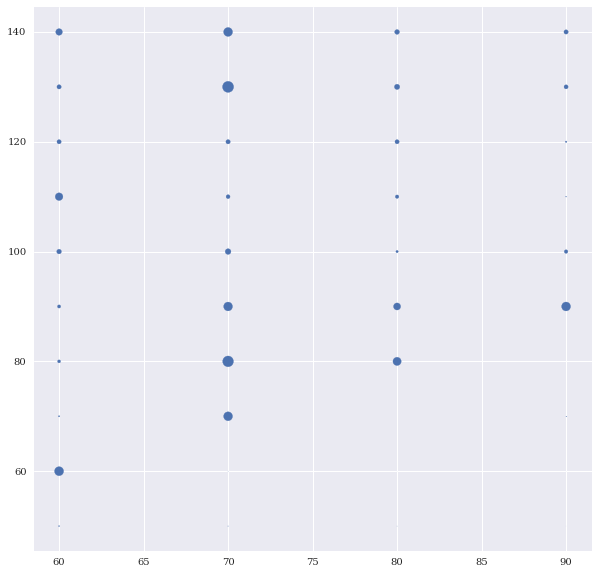

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(results['SMA1'],results['SMA2'],s=results['OUT']**5*10)

In [0]:
data = pd.DataFrame(candles)

In [62]:
data['returns'] = np.log(data['bidclose'] / data['bidclose'].shift(1))
data.dropna(inplace=True)
data['direction'] = np.sign(data['returns']).astype(int)
data.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,returns,direction
date,,,,,,,,,,,
2006-09-14 21:00:00,1.87587,1.88627,1.89187,1.87547,1.87622,1.88662,1.89222,1.87582,16291,0.005529,1
2006-09-15 21:00:00,1.88627,1.88037,1.88817,1.87537,1.88662,1.88072,1.88852,1.87572,19511,-0.003133,-1
2006-09-18 21:00:00,1.88037,1.88017,1.88397,1.87337,1.88072,1.88052,1.88432,1.87372,17201,-0.000106,-1
2006-09-19 21:00:00,1.88017,1.88217,1.88877,1.87717,1.88052,1.88252,1.88912,1.87752,18570,0.001063,1
2006-09-20 21:00:00,1.88217,1.88837,1.89297,1.88017,1.88252,1.88872,1.89332,1.88052,20067,0.003289,1


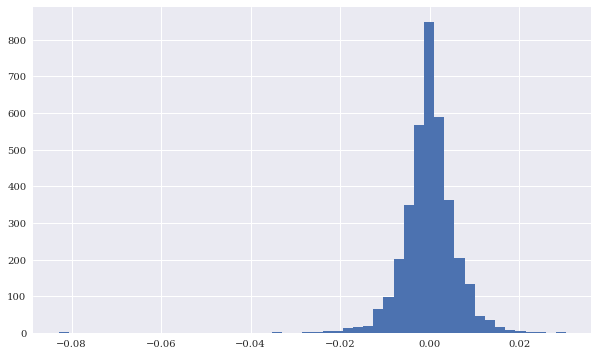

In [63]:
data['returns'].hist(bins=50, figsize=(10, 6)); 

In [0]:
lags = 2
def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)
create_lags(data)

In [65]:
data.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,returns,direction,lag_1,lag_2
date,,,,,,,,,,,,,
2006-09-14 21:00:00,1.87587,1.88627,1.89187,1.87547,1.87622,1.88662,1.89222,1.87582,16291,0.005529,1,NaN,NaN
2006-09-15 21:00:00,1.88627,1.88037,1.88817,1.87537,1.88662,1.88072,1.88852,1.87572,19511,-0.003133,-1,0.005529,NaN
2006-09-18 21:00:00,1.88037,1.88017,1.88397,1.87337,1.88072,1.88052,1.88432,1.87372,17201,-0.000106,-1,-0.003133,0.005529
2006-09-19 21:00:00,1.88017,1.88217,1.88877,1.87717,1.88052,1.88252,1.88912,1.87752,18570,0.001063,1,-0.000106,-0.003133
2006-09-20 21:00:00,1.88217,1.88837,1.89297,1.88017,1.88252,1.88872,1.89332,1.88052,20067,0.003289,1,0.001063,-0.000106


In [0]:
data.dropna(inplace=True)

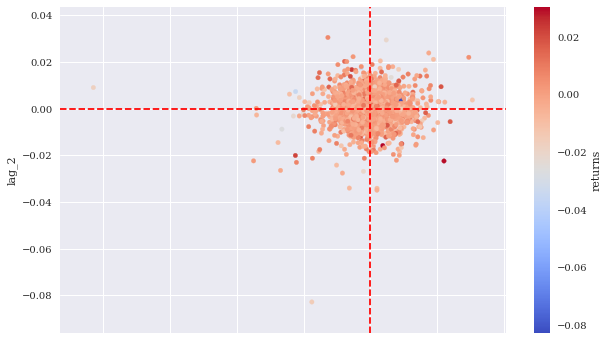

In [67]:
data.plot.scatter(x='lag_1', y='lag_2', c='returns',
    cmap='coolwarm', figsize=(10, 6), colorbar=True)
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--');

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [69]:
data['pos_ols_1'] = model.fit(data[cols],
    data['returns']).predict(data[cols])
data['pos_ols_2'] = model.fit(data[cols],
    data['direction']).predict(data[cols])
data[['pos_ols_1', 'pos_ols_2']].head()

,pos_ols_1,pos_ols_2
date,,
2006-09-18 21:00:00,-0.000287,-0.044805
2006-09-19 21:00:00,-0.000075,-0.007347
2006-09-20 21:00:00,-0.000064,-0.011337
2006-09-21 21:00:00,0.000007,-0.005634
2006-09-22 21:00:00,0.000134,0.004229


In [0]:
data[['pos_ols_1', 'pos_ols_2']] = np.where(
    data[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)

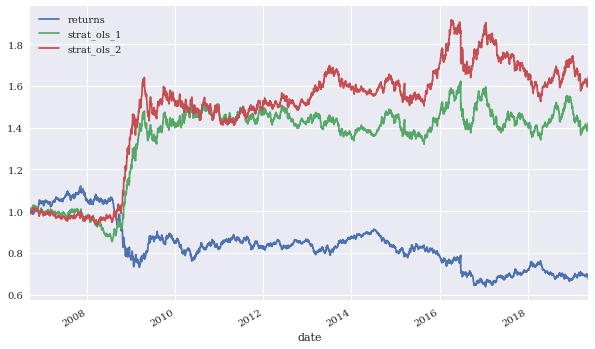

In [71]:
data['strat_ols_1'] = data['pos_ols_1'] * data['returns']
data['strat_ols_2'] = data['pos_ols_2'] * data['returns']
data[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

data[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum().apply(np.exp).plot(figsize=(10, 6));

 52 | GBP/USD | 2019-05-20 15:57:46.453000 | 1.27181, 1.27190


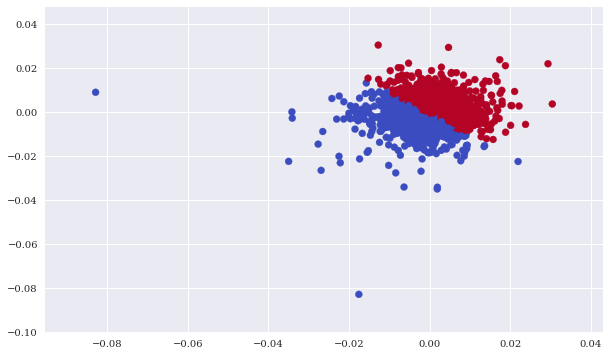

In [72]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, random_state=0)
model.fit(data[cols])

data['pos_clus'] = model.predict(data[cols])
data['pos_clus'] = np.where(data['pos_clus'] == 1, -1, 1)
data['pos_clus'].values

plt.figure(figsize=(10, 6))
plt.scatter(data[cols].iloc[:, 0], data[cols].iloc[:, 1],
    c=data['pos_clus'], cmap='coolwarm');

In [73]:
data['strat_clus'] = data['pos_clus'] * data['returns']
data[['returns', 'strat_clus']].sum().apply(np.exp)

returns       0.676144
strat_clus    0.910083
dtype: float64

 53 | GBP/USD | 2019-05-20 15:57:46.769000 | 1.27181, 1.27189


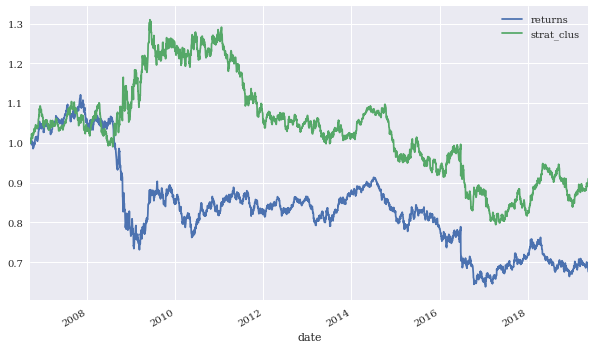

In [74]:
data[['returns', 'strat_clus']].cumsum(
    ).apply(np.exp).plot(figsize=(10, 6));

In [75]:
data[cols].head()\

,lag_1,lag_2
date,,
2006-09-18 21:00:00,-0.003133,0.005529
2006-09-19 21:00:00,-0.000106,-0.003133
2006-09-20 21:00:00,0.001063,-0.000106
2006-09-21 21:00:00,0.003289,0.001063
2006-09-22 21:00:00,0.007281,0.003289


In [0]:
def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)
        cols_bin.append(col_bin)

In [0]:
create_bins(data)

In [78]:
data[cols_bin + ['direction']].head()

,lag_1_bin,lag_2_bin,direction
date,,,
2006-09-18 21:00:00,0,1,-1
2006-09-19 21:00:00,0,0,1
2006-09-20 21:00:00,1,0,1
2006-09-21 21:00:00,1,1,1
2006-09-22 21:00:00,1,1,-1


In [79]:
grouped = data.groupby(cols_bin + ['direction'])
grouped.size()

lag_1_bin  lag_2_bin  direction
0          0          -1           497
                       1           456
           1          -1           457
                       0             1
                       1           415
1          0          -1           419
                       1           453
           1          -1           453
                       0             2
                       1           444
dtype: int64

In [0]:
res = grouped['direction'].size().unstack(fill_value=0)

In [81]:
res.head()

direction             -1   0    1
lag_1_bin lag_2_bin              
0         0          497   0  456
          1          457   1  415
1         0          419   0  453
          1          453   2  444

In [0]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [83]:
res.style.apply(highlight_max, axis=1)

In [0]:
data['pos_freq'] = np.where(data[cols_bin].sum(axis=1) == 2, -1, 1)

In [85]:
(data['direction'] == data['pos_freq']).value_counts()

False    1820
True     1777
dtype: int64

In [0]:
data['strat_freq'] = data['pos_freq'] * data['returns']  

In [87]:
data[['returns', 'strat_freq']].sum().apply(np.exp)

returns       0.676144
strat_freq    0.955902
dtype: float64

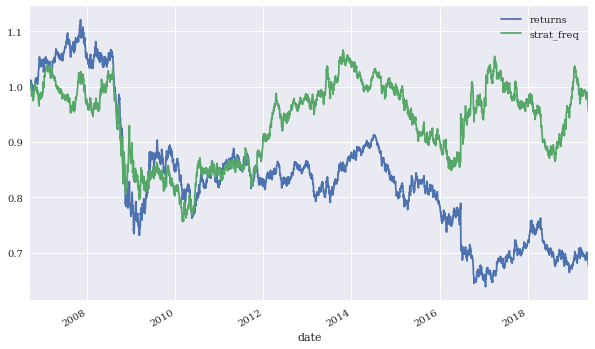

In [88]:
data[['returns', 'strat_freq']].cumsum(
    ).apply(np.exp).plot(figsize=(10, 6));

In [89]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
C = 1
models = {
    'log_reg': linear_model.LogisticRegression(C=C),
    'gauss_nb': GaussianNB(),
    'svm': SVC(C=C)
}
def fit_models(data):
    mfit = {model: models[model].fit(data[cols_bin],
        data['direction'])
            for model in models.keys()}
fit_models(data)

def derive_positions(data):
    for model in models.keys():
        data['pos_' + model] = models[model].predict(data[cols_bin])

derive_positions(data)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


 54 | GBP/USD | 2019-05-20 15:57:48.523000 | 1.27175, 1.27183


 55 | GBP/USD | 2019-05-20 15:57:49.028000 | 1.27174, 1.27181


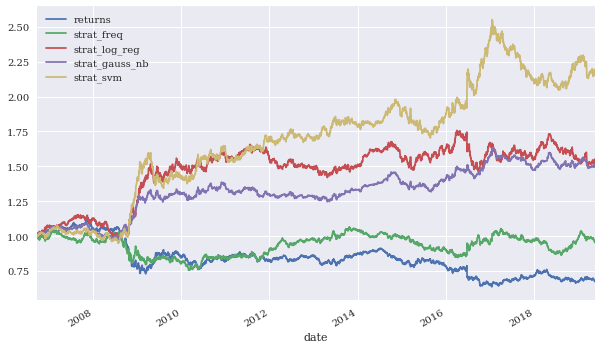

In [90]:
def evaluate_strats(data):
    global sel
    sel = []
    for model in models.keys():
        col = 'strat_' + model
        data[col] = data['pos_' + model] * data['returns']
        sel.append(col)
    sel.insert(0, 'returns')

evaluate_strats(data)
sel.insert(1, 'strat_freq')
data[sel].sum().apply(np.exp)
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [91]:
split = int(len(data) * 0.5)
train = data.iloc[:split].copy()
fit_models(train)
test = data.iloc[split:].copy()
derive_positions(test)
evaluate_strats(test)
test[sel].sum().apply(np.exp)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


returns           0.833088
strat_log_reg     1.052896
strat_gauss_nb    1.052896
strat_svm         1.205329
dtype: float64

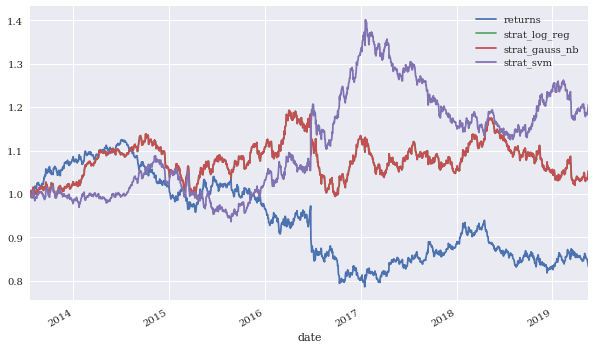

In [92]:
test[sel].sum().apply(np.exp)

In [93]:
train[sel].sum().apply(np.exp)

returns           0.811612
strat_log_reg     1.473714
strat_gauss_nb    1.281371
strat_svm         1.819984
dtype: float64

366 | GBP/USD | 2019-05-20 16:03:55.373000 | 1.27189, 1.27199


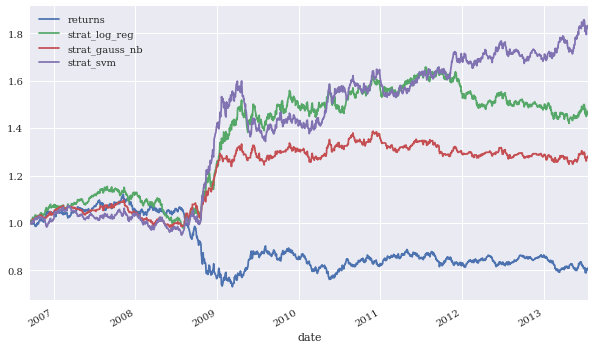

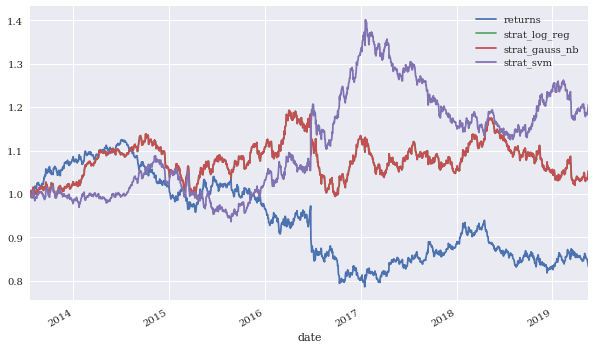

In [94]:
train[sel].cumsum().apply(np.exp).plot(figsize=(10, 6))
test[sel].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [97]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.5,
    shuffle=True, random_state=100)
train = train.copy().sort_index()
train[cols_bin].head()

,lag_1_bin,lag_2_bin
date,,
2006-09-20 21:00:00,1,0
2006-09-21 21:00:00,1,1
2006-09-22 21:00:00,1,1
2006-09-26 21:00:00,0,0
2006-09-27 21:00:00,0,0


In [98]:
test = test.copy().sort_index()
fit_models(train)
derive_positions(test)
evaluate_strats(test)
test[sel].sum().apply(np.exp)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


returns           0.752354
strat_log_reg     1.304526
strat_gauss_nb    1.403549
strat_svm         1.304526
dtype: float64

581 | GBP/USD | 2019-05-20 16:08:33.550000 | 1.27227, 1.27235


629 | GBP/USD | 2019-05-20 16:09:41.043000 | 1.27213, 1.27221


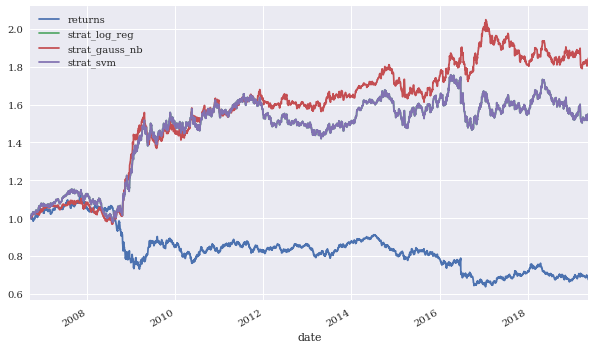

630 | GBP/USD | 2019-05-20 16:09:42.035000 | 1.27216, 1.27225


In [100]:
derive_positions(data)
evaluate_strats(data)
data[sel].sum().apply(np.exp)
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [0]:
EUR = api.get_candles('EUR/USD', period='D1', number=3600)

In [0]:
data = pd.DataFrame(candles)

In [151]:
data['returns'] = np.log(data['bidclose'] / data['bidclose'].shift(1))
data.dropna(inplace=True)
data['direction'] = np.sign(data['returns']).astype(int)
data.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,returns,direction,lag_1,lag_2,lag_1_bin,lag_2_bin
date,,,,,,,,,,,,,,,
2006-09-20 21:00:00,1.88217,1.88837,1.89297,1.88017,1.88252,1.88872,1.89332,1.88052,20067,0.003289,1,0.001063,-0.000106,1,0
2006-09-21 21:00:00,1.88837,1.90217,1.90327,1.88647,1.88872,1.90252,1.90362,1.88682,17153,0.007281,1,0.003289,0.001063,1,1
2006-09-22 21:00:00,1.90217,1.90077,1.90637,1.89927,1.90252,1.90112,1.90672,1.89962,17980,-0.000736,-1,0.007281,0.003289,1,1
2006-09-25 21:00:00,1.90077,1.89967,1.90727,1.89817,1.90112,1.90002,1.90762,1.89852,17894,-0.000579,-1,-0.000736,0.007281,0,1
2006-09-26 21:00:00,1.89967,1.89417,1.90277,1.89307,1.90002,1.89452,1.90312,1.89342,20046,-0.002899,-1,-0.000579,-0.000736,0,0


In [0]:
lags = 2
def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)
create_lags(data)

In [148]:
def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)
        cols_bin.append(col_bin)

1296 | GBP/USD | 2019-05-20 16:29:24.952000 | 1.27235, 1.27243


In [0]:
create_bins(data)

In [152]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.5,
    shuffle=True, random_state=100)
train = train.copy().sort_index()
train[cols_bin].head()

,lag_1_bin,lag_2_bin
date,,
2006-09-22 21:00:00,1,1
2006-09-25 21:00:00,0,1
2006-09-26 21:00:00,0,0
2006-09-28 21:00:00,0,0
2006-09-29 21:00:00,0,0


In [153]:
fit_models(train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1076 | GBP/USD | 2019-05-20 16:24:12.958000 | 1.27210, 1.27218


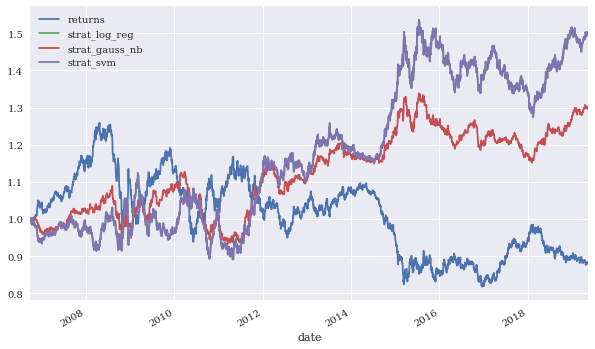

In [128]:
derive_positions(data)
evaluate_strats(data)
data[sel].sum().apply(np.exp)
data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [0]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', alpha=1e-5,
    hidden_layer_sizes=2 * [550],
    random_state=1)

In [155]:
%time model.fit(data[cols_bin], data['direction'])

1325 | GBP/USD | 2019-05-20 16:30:30.477000 | 1.27234, 1.27244
1326 | GBP/USD | 2019-05-20 16:30:30.724000 | 1.27233, 1.27244
1327 | GBP/USD | 2019-05-20 16:30:32.016000 | 1.27234, 1.27244
1328 | GBP/USD | 2019-05-20 16:30:33.436000 | 1.27234, 1.27244
1329 | GBP/USD | 2019-05-20 16:30:35.014000 | 1.27232, 1.27244
1330 | GBP/USD | 2019-05-20 16:30:35.819000 | 1.27234, 1.27244
CPU times: user 15 s, sys: 2.19 s, total: 17.2 s
Wall time: 8.84 s


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[550, 550], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [156]:
data['pos_dnn_sk'] = model.predict(data[cols_bin])
data['strat_dnn_sk'] = data['pos_dnn_sk'] * data['returns']
data[['returns', 'strat_dnn_sk']].sum().apply(np.exp)

returns         0.675497
strat_dnn_sk    2.195779
dtype: float64

1331 | GBP/USD | 2019-05-20 16:30:40.532000 | 1.27234, 1.27242


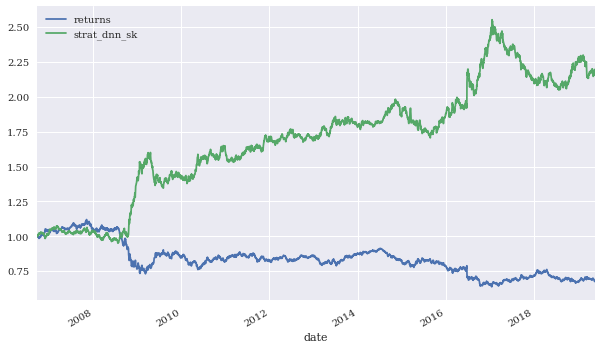

In [157]:
data[['returns', 'strat_dnn_sk']].cumsum().apply(
    np.exp).plot(figsize=(10, 6));

In [0]:
In [115]: train, test = train_test_split(data, test_size=0.5,
random_state=100)
In [116]: train = train.copy().sort_index()
In [117]: test = test.copy().sort_index()

In [160]:
In [118]: model = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=500,
hidden_layer_sizes=3 * [500], random_state=1)
In [119]: %time model.fit(train[cols_bin], train['direction'])


1343 | GBP/USD | 2019-05-20 16:31:17.678000 | 1.27232, 1.27243
1344 | GBP/USD | 2019-05-20 16:31:18.971000 | 1.27233, 1.27243
1345 | GBP/USD | 2019-05-20 16:31:22.027000 | 1.27232, 1.27243
1346 | GBP/USD | 2019-05-20 16:31:23.838000 | 1.27234, 1.27242
1347 | GBP/USD | 2019-05-20 16:31:24.812000 | 1.27232, 1.27242
1348 | GBP/USD | 2019-05-20 16:31:25.956000 | 1.27232, 1.27242
1349 | GBP/USD | 2019-05-20 16:31:27.871000 | 1.27233, 1.27241
1350 | GBP/USD | 2019-05-20 16:31:28.975000 | 1.27233, 1.27243
CPU times: user 21 s, sys: 3.5 s, total: 24.5 s
Wall time: 12.6 s


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[500, 500, 500], learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [161]:
In [120]: test['pos_dnn_sk'] = model.predict(test[cols_bin])
In [121]: test['strat_dnn_sk'] = test['pos_dnn_sk'] * test['returns']
In [122]: test[['returns', 'strat_dnn_sk']].sum().apply(np.exp)

returns         0.705911
strat_dnn_sk    0.774355
dtype: float64

1354 | GBP/USD | 2019-05-20 16:31:43.009000 | 1.27230, 1.27239


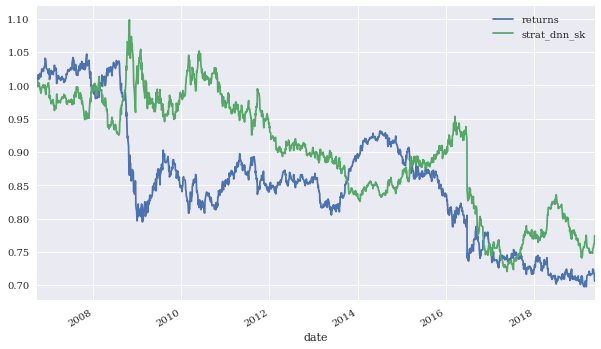

In [162]:
test[['returns', 'strat_dnn_sk']].cumsum(
).apply(np.exp).plot(figsize=(10, 6));

In [163]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)fc = [tf.contrib.layers.real_valued_column('lags', dimension=lags)]

1764 | GBP/USD | 2019-05-20 16:44:20.476000 | 1.27248, 1.27258


In [164]:
fc = [tf.contrib.layers.real_valued_column('lags', dimension=lags)]

1775 | GBP/USD | 2019-05-20 16:44:37.042000 | 1.27251, 1.27261
1776 | GBP/USD | 2019-05-20 16:44:37.932000 | 1.27251, 1.27260
1777 | GBP/USD | 2019-05-20 16:44:38.312000 | 1.27251, 1.27261
1778 | GBP/USD | 2019-05-20 16:44:38.823000 | 1.27251, 1.27260

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
bins = 2

In [0]:
model = tf.contrib.learn.DNNClassifier(hidden_units=3 * [500],
    n_classes=3,
    feature_columns=fc)

In [169]:
def input_fn():
    fc = {'lags': tf.constant(data[cols_bin].values)}
    la = tf.constant(data['direction'].apply(
        lambda x: 0 if x < 0 else 1).values,
        shape=[data['direction'].size, 1])
    return fc, la

1855 | GBP/USD | 2019-05-20 16:47:10.771000 | 1.27252, 1.27263


In [170]:
%time model.fit(input_fn=input_fn, steps=250)

1861 | GBP/USD | 2019-05-20 16:47:23.782000 | 1.27253, 1.27263
1862 | GBP/USD | 2019-05-20 16:47:27.727000 | 1.27254, 1.27263
1863 | GBP/USD | 2019-05-20 16:47:31.891000 | 1.27254, 1.27263
1864 | GBP/USD | 2019-05-20 16:47:38.531000 | 1.27255, 1.27263
1865 | GBP/USD | 2019-05-20 16:47:41.480000 | 1.27254, 1.27262
1866 | GBP/USD | 2019-05-20 16:47:51.949000 | 1.27253, 1.27262
1867 | GBP/USD | 2019-05-20 16:47:56.474000 | 1.27253, 1.27262
1868 | GBP/USD | 2019-05-20 16:47:59.510000 | 1.27252, 1.27262
1869 | GBP/USD | 2019-05-20 16:48:00.303000 | 1.27250, 1.27260
1870 | GBP/USD | 2019-05-20 16:48:06.494000 | 1.27251, 1.27261
1871 | GBP/USD | 2019-05-20 16:48:08.235000 | 1.27252, 1.27261
1872 | GBP/USD | 2019-05-20 16:48:17.439000 | 1.27252, 1.27260
1873 | GBP/USD | 2019-05-20 16:48:25.386000 | 1.27251, 1.27260
CPU times: user 1min 58s, sys: 817 ms, total: 1min 59s
Wall time: 1min 2s


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7f2f22b5bb00>, 'hidden_units': [500, 500, 500], 'feature_columns': (_RealValuedColumn(column_name='lags', dimension=2, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x7f2f35bd89d8>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [171]:
model.evaluate(input_fn=input_fn, steps=1)

1874 | GBP/USD | 2019-05-20 16:48:25.656000 | 1.27251, 1.27261


{'accuracy': 0.51710707, 'global_step': 250, 'loss': 0.69318414}

In [172]:
pred = np.array(list(model.predict(input_fn=input_fn)))
pred[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [173]:
data['pos_dnn_tf'] = np.where(pred > 0, 1, -1)
data['strat_dnn_tf'] = data['pos_dnn_tf'] * data['returns']
data[['returns', 'strat_dnn_tf']].sum().apply(np.exp)

returns         0.675497
strat_dnn_tf    2.195779
dtype: float64

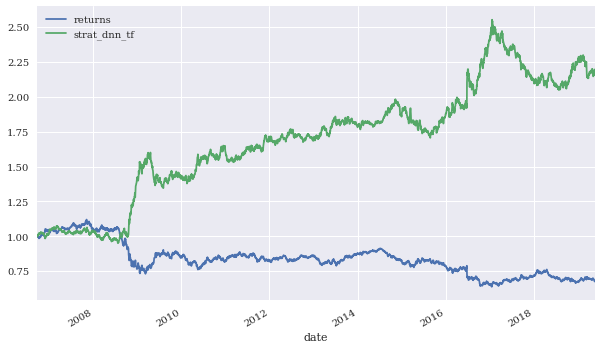

In [174]:
data[['returns', 'strat_dnn_tf']].cumsum(
    ).apply(np.exp).plot(figsize=(10, 6));